In [1]:
import galsim
import numpy as np
import pylab as plt
import time
%matplotlib inline

In [2]:
def add_image(im1, im2):
    for i in range(len(im2[0])):
        for j in range(len(im2[:,0])):
            im1.addValue(j+1, i+1, im2[i,j])
    return im1

class astro_bias(object):
    
    def __init__(self, sigma=1., g1=0, g2=0, nx=41, ny=41, pixel_scale=0.2, 
                 mas=np.sqrt(20.), nreal=1000):
        
            self.sigma = sigma
            self.nx = nx
            self.ny = ny 
            self.pixel_scale = pixel_scale
            self.mas = mas
            self.nreal = nreal
            self.g1 = g1
            self.g2 = g2

    def get_gaussian_image(self, dx, dy):
        
        gauss = galsim.Gaussian(sigma=self.sigma, flux=1.)
        gauss = gauss.shear(g1=self.g1, g2=self.g2)
        gauss = gauss.shift(dx=dx, dy=dy)
        image = gauss.drawImage(method='auto', nx=self.nx, ny=self.ny, 
                                scale=self.pixel_scale)
        return image
    
    def coadds_gal_atmo_shift(self):
        
        self.image = galsim.Image(self.nx, self.ny, scale=self.pixel_scale)
        image_array = np.zeros_like(self.image.array)

        for i in range(self.nreal):
            dx = np.random.normal(scale=self.mas*1e-3)
            dy = np.random.normal(scale=self.mas*1e-3)
            im = self.get_gaussian_image(dx, dy)
            image_array += im.array
        self.image = add_image(self.image, image_array)
            
    def get_shear(self):
        
        self.shear = galsim.hsm.FindAdaptiveMom(self.image)
        self.observed_g1 = self.shear.observed_shape.g1
        self.observed_g2 = self.shear.observed_shape.g2

In [13]:
A = time.time()
ab = astro_bias(sigma=1., g1=0.2, g2=0.2, nx=41, ny=41, pixel_scale=0.2, 
                mas=np.sqrt(10000.), nreal=1000)
ab.coadds_gal_atmo_shift()
ab.get_shear()
print np.sqrt(ab.g1**2 + ab.g2**2)
print np.sqrt(ab.observed_g1**2 + ab.observed_g2**2)
B = time.time()

0.28284271247461906
0.2790984722259268


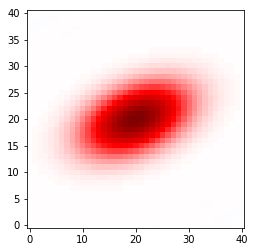

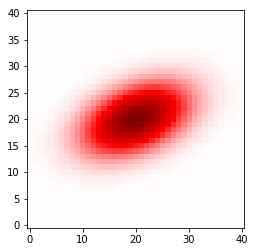

In [14]:
plt.figure()
plt.imshow(ab.image.array, vmin=-np.max(ab.image.array), vmax=np.max(ab.image.array), cmap=plt.cm.seismic)
plt.gca().invert_yaxis()
plt.savefig('test_1_shift_1000_real.pdf')

plt.figure()
image = ab.get_gaussian_image(0,0)
plt.imshow(image.array, vmin=-np.max(image.array), vmax=np.max(image.array), cmap=plt.cm.seismic)
plt.gca().invert_yaxis()
plt.savefig('test_0.pdf')


#ab.mas * 1e-3


In [8]:
ab.g1
ab.observed_g1

0.19928498197618838

In [ ]:


gauss = galsim.Gaussian(sigma=1., flux=1.)
gauss = gauss.shear(g1=0.2, g2=0.2)
gauss = gauss.shift(dx=0., dy=0.)
image = gauss.drawImage(method='no_pixel', nx=21, ny=21, scale=0.5)

#gauss2 = galsim.Gaussian(sigma=1., flux=1.)
#gauss2 = gauss2.shear(g1=-0.2, g2=-0.2)
#gauss2 = gauss2.shift(dx=2, dy=2)
#im2 = gauss2.drawImage(method='no_pixel', nx=21, ny=21, scale=0.5)

#image = add_image(im1, im2)

plt.imshow(image.array, vmin=-np.max(image.array), vmax=np.max(image.array), cmap=plt.cm.seismic)
plt.gca().invert_yaxis()

In [ ]:
#image = galsim.Image(21,21, scale=0.2)

In [ ]:
A = galsim.hsm.FindAdaptiveMom(image)

In [ ]:
A.observed_shape.g1